## КР 5

На занятиях рассматривались классы Card – игральная карта и Deck – карточная колода.
10000 раз сдаются пять карт. Вычислить частоты появления в этой колоде трех, четырех и
пяти карт подряд, например, 6, 7, 8, 9, 10 или 10, В, Д, К, Т. Масть при этом не учитывается.
Нарисовать распределение раскладов (это мы на занятиях тоже делали).

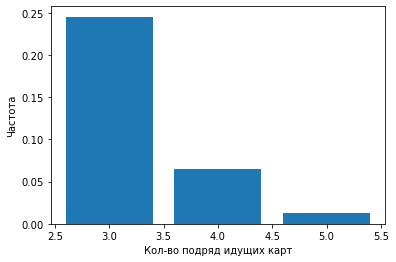

In [3]:
import random
import matplotlib.pyplot as plt


def inorder(L):
	n = 1
	list_n = []
	for i in range(1, len(L)):
		if L[i] - L[i-1] == 1:
			n += 1
		else:
			list_n.append(n)
			n = 1
	else:
		list_n.append(n)
	return max(list_n)


class Card:

	ranks = ('6', '7', '8', '9', '10', 'В', 'Д', 'К', 'Т')
	suits = ('\u2660', '\u2663', '\u2666', '\u2665')
	mes = 'Неккоректное старшинство и/или масть карты: ({}, {})'
	value_ranks = {'6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'В': 11, 'Д': 12, 'К': 13, 'Т': 14}

	def __init__(self, rank, suit):
		if (rank not in self.ranks) or (suit not in self.suits):
			raise ValueError(Card.mes.format(rank, suit))
		self.rank = rank
		self.suit = suit

	def __repr__(self):
		return f'{self.rank}{self.suit}'

	def __str__(self):
		return f'{self.rank}{self.suit}'

	def __sub__(self, other):
		if not isinstance(other, Card):
			raise AttributeError('')
		return Card.value_ranks[self.rank] - Card.value_ranks[other.rank]

	def __lt__(self, other):
		if not isinstance(other, Card):
			raise AttributeError('')
		return Card.value_ranks[self.rank] < Card.value_ranks[other.rank]


class Deck:

	def __init__(self):
		self.deck = [Card(rank, suit) for rank in Card.ranks for suit in Card.suits]

	def __len__(self):
		return len(self.deck)

	def shuffle(self):
		random.shuffle(self.deck)

	def __repr__(self):
		return ' | '.join(map(str, self.deck))

	def __str__(self):
		return self.__repr__()

	def __iter__(self):
		return iter(self.deck)

	def deal(self, n):
		l = len(self)
		if n <= l:
			dealed = self.deck[:n]
			self.deck = self.deck[n:]
			return dealed
		else:
			raise ValueError(f'Нельзя сдать {n} из колоды с {l} картами')


class Game:

	def __init__(self, m=10000, n=5):
		self.m = m
		self.n = n

	def dist_cards(self, *args):
		D = {i: 0 for i in args}
		for _ in range(self.m):
			deck = Deck()
			deck.shuffle()
			dealt = deck.deal(self.n)
			n = inorder(sorted(dealt))
			if n in D:
				D[n] += 1
		for key in D:
			D[key] /= self.m
		return D

	def view(self, *args):
		D = self.dist_cards(*args)
		plt.bar(D.keys(), D.values())
		plt.xlabel('Кол-во подряд идущих карт')
		plt.ylabel('Частота')
		plt.show()


game = Game()
game.view(3, 4, 5)

Проверка (сумма частот равна 1)

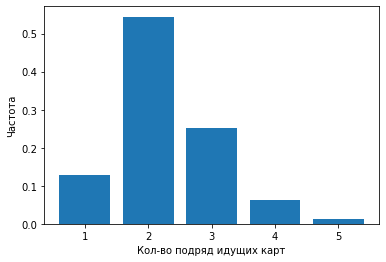

In [2]:
game = Game()
game.view(1, 2, 3, 4, 5)